# Machine Learning & Statistics Project 2020
By Kevin Dooley

![image](wind.png)

### Project Objective
To create a web service that uses machine learning to make predictions based on the data set, `powerproduction` which is saved in this repository. The goal is to produce a model that accurately predicts wind turbine poweroutput from windspeed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

### Background on Wind Energy & Power

Wind energy refers to the process of creating electricity o rmechanical power using the wind, or air flows that occur naturally in the earth’s atmosphere. Modern wind turbines are used to capture kinetic energy from the wind and generate electricity. [7]

Wind energy provides a clean and sustainable solution to our energy problems. It can be used as an alternative to fossil fuels in generating electricity, without the direct emission of greenhouse gases. Wind will always be inexhaustible and shoudl be utilised. Wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland’s largest and cheapest renewable electricity resource. [8]

### How Wind Turbines Work
Wind turbines work on a simple principle, as the name suggests, they use wind to make electricity. Wind turns the propeller blades of a turbine around a rotor. That rotor then spins a generator which in turn creates electricity. There is aerodynamic force created from the rotation of rotor blades. These are connected to the generator. The translation of aerodynamic force to rotation of a then generator creates electricity. 

### Modelling  Wind energy
The modelling of wind energy is a very important aspect of the process as you do not have a definite or known amount of energy that will be returned at all times, it depends on numerous factors. Mainly the speed of wind. Wind energy system models can be used to predict on wind resource, electrical response/power generated and the returns of economic market. [10] They will be used to predict expected power output in this project. 

In [1]:
## import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr
from numpy import loadtxt
from keras.models import load_model
import pickle

#### Load Dataset
To be able to give an overview of the dataset, I had to first obtain it. Copied and saved the dataset from Moodle as a CSV file in my repository. This was saved as powerproduction.csv and was the basis of the project.

In [2]:
df = pd.read_csv("powerproduction.csv") #read the csv file using pandas
df # called the dataset df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
print("Rows x Columns:", df.shape)

Rows x Columns: (500, 2)


The powerproduction.csv has two variables: speed and power. There are also 500 rows in the dataset.

In [4]:
# glance at data - show first 5 rows
df.head()


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
# glance at data - show last 5 rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [6]:
# glance at data - show 15 rows
df.sample(15)

,speed,power
399,19.845,104.188
91,4.930,0.946
454,22.823,101.342
265,13.388,62.315
306,15.541,85.891
358,17.893,90.546
173,8.659,16.413
247,12.462,44.745
80,4.179,1.035
75,3.879,0.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


By using these simple functions it is easy to do a overview comparision for both variables of the dataset. These functions do not really tell us much information but they do familarise us with the dataset. The first observation to make from the above is that there appears to be a power output of 0watt, when in fact there was substantial windspeed. This will need to be investigated further but you could make a reasonable assumption that there was an issue or downtime during these periods. Wind Turbines also shutdown automatically if wind speeds are too high and that may also be a contributing factor. 

In [8]:
#describe function to show statistical summary of the dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The statistical summary above gives us a top level look at the dataset. It can be seen that that the average wind speed is 12.59m/s and the average power output is 48.01MW.

### Plot Dataset

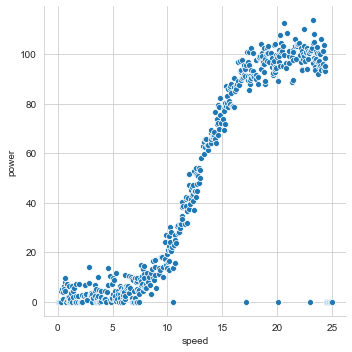

In [9]:
# https://seaborn.pydata.org/generated/seaborn.relplot.html
#scatterplot showing relationship wind v power
sns.set_style('whitegrid')
sns.relplot(x="speed", y="power",data=df)


Text(0.5, 1.0, 'Wind Speed vs Generated Power ')

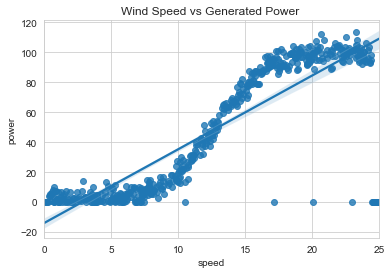

In [10]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=df)
reg.set_title("Wind Speed vs Generated Power ")

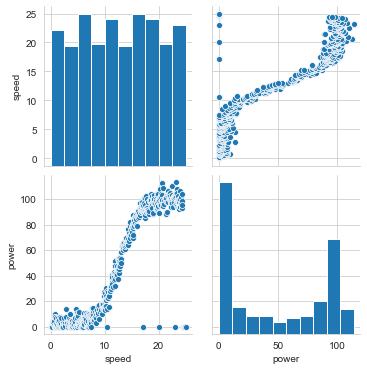

In [11]:
sns.pairplot(df)

The above relationship plots are clearly indicating that there are some outliers in the dataset. As mentioned above, the values for power generated are 0KW when the wind speed is up to 25m/s which indicates there was downtime either due to a known/unknown issue or maintenance. 

The graph below depicts the relationship between wind speed and power production. The graph illustrates typical wind turbine power curve in which you can determine the cut-in, nominal and cut-out speed. The cut-in speed (approx. 3.5m/s) is the minimum threshold wind speed must reach for the turbine to begin generating electricity. A turbine will achieve its nominal power output at appox. 12 - 14m/s and the turbine will reach its cut-out speed at approximately 25 m/s. The cut-out point means the turbine stops power production to protect itself from potentially damaging speeds. [11]

As can been seen in plots above, the 0MW power outputs close to 25m/s may in fact be as a result of the wind turbine coming close to its cut-out point rather than an issue or maintenance. As per the source above, the cut-off point is approx 25m/s but depending on the type and location of the turbine, one could assume that the cut-off point could vary slightly and based on the plots above, many of those 0KW power outputs occur from appox. 23.5m/s onwards. The other outliers from approx 10 - 20m/s would most likely be as a result of planned/unlanned maintenance. 
![image](wind_vs_power.png)

It is important that you complete data cleaning when doing data analysis. When completing a model or prediction, it is important to have accurate information. Data cleansing  improves your data quality by finding and eliminating errors in the data and in doing so, increases overall productivity. When you clean your data, all outdated, incorrect or misleading information is removed – leaving you with the highest quality information to then complete your analysis on. [12] 

This dataset has results in it that can be removed (cleaned up) i.e maintenance and wind-cut out speed. if we left these results in the dataset, it could lead to less accurate modelling and predictions.

In [12]:
# adapted from https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
# remove unexpected zeros from dataset as these will zeros will make our modelling less accurate
# show values not equal 0
zero_removed = df[(df["speed"]!=0) & (df["power"]!=0)]
zero_removed


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [13]:
# missing first zero of dataset
#need to incorporate as it is correct - 0 wind speed will give 0 output
zero_included = df[(df["speed"]==0) & (df["power"]==0)]
#zero_included

new_df = zero_included.append(zero_removed)
ds = new_df #new dataframe with zero added at the start 

#ds to be used as new dataset

Text(0.5, 1.0, 'Wind Speed vs Generated Power - Clean')

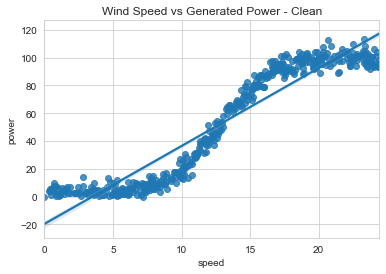

In [14]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=ds)
reg.set_title("Wind Speed vs Generated Power - Clean")

The unexpected zero results have now been removed from the dataset. You can see from both the plot and table above, the 0KW output datapoints have now been removed. The dataset has been cleaned up and it is now in a better state to complete data analysis on it. 

### Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). [4] Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). Basically that y can be calculated from a linear combination of the input variables (x). [5] In this instance, wind speed in the (x) input and power the (y) output variable. 

Before attempting to fit a linear model to observed data, you should first determine whether or not there is a relationship between the variables of interest, i.e wind energy and power. This does not necessarily imply that one variable causes the other but that there is some significant association between the two variables. A scatterplot can be a helpful tool (as seen above) in determining the strength of the relationship between two variables. If there appears to be a relationship between the proposed explanatory and dependent variables, then fitting a linear regression model to the data may be useful. If there is no relationship, it will most likely not be useful. [13]

There are two main ways to perform linear regression in Python — with Statsmodels and scikit-learn. In this example, I will use scikit-learn to complete the model assisted by numpy and pandas. Sk-Learn is one of the golden standard libraries when it comes to machine learning in Python and contains many packages, one of which is regression. To start it, you must first import the package - `import sklearn.linear_model as lm`.

The powerproduction dataset is suitable for a regression model because it contains two variables that can be measured at a continuous level. Based on the plots above, it appears that a linear regression could work but may no the the best fit and not provide meaningful or accurate data, possibly a polynomial regression fit model would work better. Linear regression will be examined though to determine its suitability. 

In [15]:
#lecture - link to repo
#create linear model instance
# adapted from https://realpython.com/linear-regression-in-python/
m = lm.LinearRegression()

In [16]:
#create x & y
x = ds["speed"]
y = ds["power"]

# x must be 2 dimensional. .reshape(-1,1) changes x to 2 dimensional (single column)
x1 = x.values.reshape(-1, 1)

#model to fit data
reg_model = m.fit(x1,y)
reg_model

LinearRegression()

In [17]:
#intercept
m.intercept_

-19.636232996770858

In [18]:
#coefficient
m.coef_

array([5.60668469])

In [19]:
#how good is the model
m.score(x1,y)

0.8983450728341917

In [20]:
#predict
predict = reg_model.predict(x1)
predict

array([-19.636233  , -17.81406047, -17.39355912, -17.11322489,
       -16.82728397, -16.68711685, -16.54694973, -16.40678261,
       -16.12644838, -15.84611415, -15.70594703, -15.14527856,
       -15.00511144, -14.86494432, -14.44444297, -14.30427586,
       -14.16410874, -14.02394162, -13.74360739, -13.46327315,
       -13.18293892, -12.62227045, -12.48210333, -11.78126774,
       -11.64110063, -11.21499259, -10.37398989, -10.09365565,
        -9.11248583,  -8.97231871,  -7.43048042,  -7.15014619,
        -6.16897637,  -5.74847502,  -5.32236698,  -5.18219986,
        -4.48136428,  -3.78052869,  -3.64036157,  -3.0796931 ,
        -2.79935887,  -2.65919175,  -2.51902463,  -2.37885752,
        -1.67802193,  -0.69685211,  -0.55668499,  -0.41651787,
         0.14975728,   0.57025863,   0.71042575,   1.1309271 ,
         1.27109422,   2.25226404,   2.39243116,   2.53259827,
         2.67276539,   3.79410233,   4.49493792,   4.63510503,
         5.76204866,   5.90221577,   6.18255001,   6.88

In [21]:
#get y predict calculated manually
pred = m.intercept_ + m.coef_ * x1
#pred

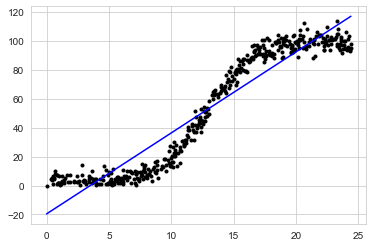

In [22]:
#link to repo lecture notes
#plot showing model in blue vs actual
x = ds["speed"].to_numpy()
y = ds["power"].to_numpy()

a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, predict , 'b-');

In [23]:
# dataframe to compare actual vs predicted power for linear regression
compare = pd.DataFrame({'Wind Speed':x,'Actual Power': y, 'Predicted Power': predict})
compare

# compare.sample(15) to see random sample of dataset

,Wind Speed,Actual Power,Predicted Power
0,0.000,0.000,-19.636233
1,0.325,4.331,-17.814060
2,0.400,5.186,-17.393559
3,0.450,3.826,-17.113225
4,0.501,1.048,-16.827284
...,...,...,...
447,24.249,103.700,116.320264
448,24.299,93.694,116.600598
449,24.349,93.078,116.880933
450,24.374,98.223,117.021100


In [24]:
#s = compare.sample(15)
#print(s.to_string(index=False))

The table and plot above seems to indicate that linear regression may not be the most accurate model for this dataset as initially expected. The comparision shows that predicted powers are not very likely and the model is not a good fit. There are huge differences in actual vs predicted power output, if you look at index 450, the actual power is 98MW and the predicted is 117MW. The prediction power output yields a error of 19MW. For example, assuming the power measurement is `MW- Megawatt` (the usual output of wind turbines),the predicted error of 19MW could result in the company making poor choices that would most likely negatively affect the Wind Turbine Company, either economically or otherwise.  Examing indexes 447 - 451 all yield similiar differences between the actual vs predicted. 

The table also shows negative predicted powers when the wind speed is very incorrect. Even when wind speed is at 0m/s, the model predicts that the predicted power should be -19.6MW indicating the wind turbine consuming huge amounts of energy it is  while it is static. And while wind turbines do consume energy, it would not to be that significant. Overall, it can be concluded that linear regression is not the best fit model for this data and a more accurate model can be determined. 

In [25]:
#save linear model for webpage
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
reg_model = 'reg.sav'
pickle.dump(pred, open(reg_model, 'wb'))



## Neural Networks

Neural networks, also known as artificial neural networks (ANNs) are a subset of machine learning and play a major role deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another. [16]  A Neural Network is a web of interconnected entities known as nodes wherein each node is responsible for a simple computation. In this way, a Neural Network functions similarly to the neurons in the human brain.


Artificial neural networks (ANNs) comprise of node layers with an input layer, at least one hidden layer and an output layer. each neuron conects to an associated weight and threshold. An artificial neuron simulates how a biological neuron behaves by adding together the values of the inputs it receives. If this is above some threshold, the neuron is activated and it sends its own signal to its next layer, hidden layer. once the hideen layer is activated it sends on to other neurons and on to the output.[16]

Neural networks rely on training data to learn and improve their accuracy over time but once they have been tested and validated to an accurate state they can be very powerful tools. The key with neural networks is to understand the mathematics behind the algorithm to allow you to chose the best possible model. They can be used in a variety of applications from forecasting and marketing research to fraud detection and image recognition. [18]

![image](neural1.png)

Neural Networks may be classified as machine learning but in fact, there are some core differences, a couple of whihc are documented below.
1. Although Machine Learning models can learn from data, in the initial stages of the process, they may require some human intervention. Neural networks do not require any human intervention as the  nested layers within the algorithm pass the data through hierarchies of various concepts, which eventually makes them capable of learning through their own errors.
2. Machine Learning requires a high level of programming, frameworks and data structure whereas the programming level never for neural networks is relatively basic as the libraries available (keras & tensorflow) are easy to use. The difficulty with nerual networks is understanding the correct modelling use and apply to your dataset. you need a strong Mathematical background. 

Some of the best frameworks available for deep learning and neural networks is keras and tensorflow. Both of which will be utilised in this notebook to predict power output from wind speed.

In [26]:
ds1 = ds #values of clean dataset
ds1 

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [27]:
#https://stackoverflow.com/questions/57872755/what-is-1-in-python
# how to assign variables to each column

#can access columns this way also
# X = ds1[:,0]
# y = ds1[:,-1]

#create x & y
X = ds1["speed"]
y = ds1["power"]

# x must be 2 dimensional. .reshape(-1,1) changes x to 2 dimensional (single column)
X = X.values.reshape(-1, 1)

#print(x) to see x values
#print(y) to y values

In [28]:
# adapted from lectures
# https://realpython.com/train-test-split-python-data/#the-importance-of-data-splitting
# trying to use train test for this model

# split dataset into train & test
# test sample size 0.25 for now. might adjust at later stage 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# show train and test sample sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(316, 1)
(316,)
(136, 1)
(136,)


In [29]:
# A sequential model
model = kr.models.Sequential()

In [30]:
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [31]:
#run model on training data
model_fit = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split = 0.2)
model_fit

Epoch 1/500
26/26 [==============================] - 2s 65ms/step - loss: 4247.2272 - val_loss: 3984.5129
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 4364.2520 - val_loss: 3883.5383
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 4340.8751 - val_loss: 3778.5627
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 3933.8565 - val_loss: 3667.0847
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 3660.7089 - val_loss: 3537.8640
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 3748.8184 - val_loss: 3384.1472
Epoch 7/500
26/26 [==============================] - 0s 2ms/step - loss: 3563.6674 - val_loss: 3213.2822
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 3618.2323 - val_loss: 3060.7417
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 3080.6686 - val_loss: 2950.3501
Epoch 10/500
26/26 [==============================] - 

26/26 [==============================] - 0s 2ms/step - loss: 732.8808 - val_loss: 727.8773
Epoch 79/500
26/26 [==============================] - 0s 2ms/step - loss: 736.6378 - val_loss: 713.1168
Epoch 80/500
26/26 [==============================] - 0s 3ms/step - loss: 729.0438 - val_loss: 698.2502
Epoch 81/500
26/26 [==============================] - 0s 2ms/step - loss: 746.8639 - val_loss: 683.6687
Epoch 82/500
26/26 [==============================] - 0s 2ms/step - loss: 680.8352 - val_loss: 669.8115
Epoch 83/500
26/26 [==============================] - 0s 3ms/step - loss: 648.9963 - val_loss: 656.0551
Epoch 84/500
26/26 [==============================] - 0s 2ms/step - loss: 676.5750 - val_loss: 641.9993
Epoch 85/500
26/26 [==============================] - 0s 2ms/step - loss: 618.6474 - val_loss: 628.6936
Epoch 86/500
26/26 [==============================] - 0s 3ms/step - loss: 673.1278 - val_loss: 615.0833
Epoch 87/500
26/26 [==============================] - 0s 3ms/step - loss: 604

26/26 [==============================] - 0s 2ms/step - loss: 128.5133 - val_loss: 133.1884
Epoch 157/500
26/26 [==============================] - 0s 2ms/step - loss: 119.4787 - val_loss: 130.6159
Epoch 158/500
26/26 [==============================] - 0s 2ms/step - loss: 117.1294 - val_loss: 128.9875
Epoch 159/500
26/26 [==============================] - 0s 2ms/step - loss: 116.9111 - val_loss: 126.1778
Epoch 160/500
26/26 [==============================] - 0s 2ms/step - loss: 113.7983 - val_loss: 124.6574
Epoch 161/500
26/26 [==============================] - 0s 2ms/step - loss: 121.6033 - val_loss: 122.6524
Epoch 162/500
26/26 [==============================] - 0s 2ms/step - loss: 111.9194 - val_loss: 120.0996
Epoch 163/500
26/26 [==============================] - 0s 2ms/step - loss: 113.8274 - val_loss: 118.3242
Epoch 164/500
26/26 [==============================] - 0s 2ms/step - loss: 109.4290 - val_loss: 116.6531
Epoch 165/500
26/26 [==============================] - 0s 2ms/step - 

26/26 [==============================] - 0s 2ms/step - loss: 57.1408 - val_loss: 67.2924
Epoch 236/500
26/26 [==============================] - 0s 2ms/step - loss: 70.5274 - val_loss: 67.4060
Epoch 237/500
26/26 [==============================] - 0s 2ms/step - loss: 65.3657 - val_loss: 66.2458
Epoch 238/500
26/26 [==============================] - 0s 2ms/step - loss: 68.4364 - val_loss: 66.6620
Epoch 239/500
26/26 [==============================] - 0s 2ms/step - loss: 65.8142 - val_loss: 66.0950
Epoch 240/500
26/26 [==============================] - 0s 2ms/step - loss: 64.4051 - val_loss: 65.9206
Epoch 241/500
26/26 [==============================] - 0s 2ms/step - loss: 68.0833 - val_loss: 65.2664
Epoch 242/500
26/26 [==============================] - 0s 2ms/step - loss: 71.7004 - val_loss: 65.5202
Epoch 243/500
26/26 [==============================] - 0s 2ms/step - loss: 67.6102 - val_loss: 65.5639
Epoch 244/500
26/26 [==============================] - 0s 2ms/step - loss: 68.0892 - va

26/26 [==============================] - 0s 3ms/step - loss: 59.2803 - val_loss: 53.9686
Epoch 315/500
26/26 [==============================] - 0s 2ms/step - loss: 62.6568 - val_loss: 54.8580
Epoch 316/500
26/26 [==============================] - 0s 2ms/step - loss: 56.0689 - val_loss: 53.4519
Epoch 317/500
26/26 [==============================] - 0s 2ms/step - loss: 58.7331 - val_loss: 53.7853
Epoch 318/500
26/26 [==============================] - 0s 2ms/step - loss: 59.8032 - val_loss: 53.7933
Epoch 319/500
26/26 [==============================] - 0s 2ms/step - loss: 61.0367 - val_loss: 53.6881
Epoch 320/500
26/26 [==============================] - 0s 2ms/step - loss: 56.5537 - val_loss: 53.5596
Epoch 321/500
26/26 [==============================] - 0s 2ms/step - loss: 53.2846 - val_loss: 52.8014
Epoch 322/500
26/26 [==============================] - 0s 2ms/step - loss: 59.1702 - val_loss: 54.1784
Epoch 323/500
26/26 [==============================] - 0s 2ms/step - loss: 54.5156 - va

26/26 [==============================] - 0s 2ms/step - loss: 49.5825 - val_loss: 43.4215
Epoch 394/500
26/26 [==============================] - 0s 2ms/step - loss: 45.7144 - val_loss: 43.0310
Epoch 395/500
26/26 [==============================] - 0s 2ms/step - loss: 46.6464 - val_loss: 43.0411
Epoch 396/500
26/26 [==============================] - 0s 2ms/step - loss: 47.2822 - val_loss: 42.9111
Epoch 397/500
26/26 [==============================] - 0s 2ms/step - loss: 45.1617 - val_loss: 42.6900
Epoch 398/500
26/26 [==============================] - 0s 2ms/step - loss: 47.7306 - val_loss: 42.4364
Epoch 399/500
26/26 [==============================] - 0s 2ms/step - loss: 44.7154 - val_loss: 42.5182
Epoch 400/500
26/26 [==============================] - 0s 3ms/step - loss: 52.8482 - val_loss: 41.9661
Epoch 401/500
26/26 [==============================] - 0s 2ms/step - loss: 48.2084 - val_loss: 41.9015
Epoch 402/500
26/26 [==============================] - 0s 2ms/step - loss: 43.9777 - va

26/26 [==============================] - 0s 2ms/step - loss: 35.6207 - val_loss: 32.2336
Epoch 473/500
26/26 [==============================] - 0s 2ms/step - loss: 37.3121 - val_loss: 31.9126
Epoch 474/500
26/26 [==============================] - 0s 2ms/step - loss: 38.5084 - val_loss: 31.7652
Epoch 475/500
26/26 [==============================] - 0s 2ms/step - loss: 37.1083 - val_loss: 31.8785
Epoch 476/500
26/26 [==============================] - 0s 2ms/step - loss: 35.7574 - val_loss: 31.6671
Epoch 477/500
26/26 [==============================] - 0s 2ms/step - loss: 32.7746 - val_loss: 31.6000
Epoch 478/500
26/26 [==============================] - 0s 2ms/step - loss: 34.0707 - val_loss: 31.2133
Epoch 479/500
26/26 [==============================] - 0s 2ms/step - loss: 31.1773 - val_loss: 31.3017
Epoch 480/500
26/26 [==============================] - 0s 2ms/step - loss: 32.4811 - val_loss: 31.2149
Epoch 481/500
26/26 [==============================] - 0s 2ms/step - loss: 33.8197 - va

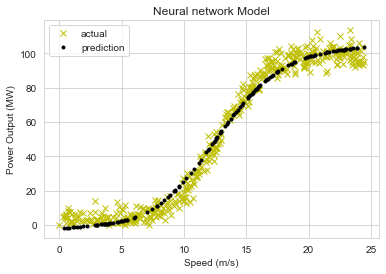

In [32]:
# plot neuron network vs actual data

plt.plot(X, y,'yx', label='actual')
plt.plot(X_test, model.predict(X_test), 'k.',label='prediction')
plt.xlabel('Speed (m/s)')
plt.ylabel('Power Output (MW)')
plt.title("Neural network Model")
plt.legend();

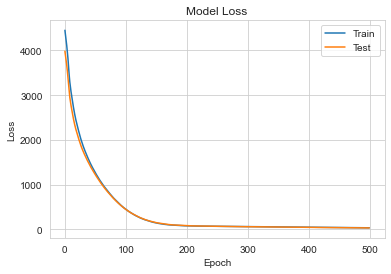

In [33]:
# adapted from https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Very little model loss between the train and test set.

In [34]:
# show prediction examples

output1, output2, output3 = [[10], [30], [35]]
print("Predicted power output at 10(m/s):", model.predict(output1))
print("Predicted power output at 30(m/s):", model.predict(output2))
print("Predicted power output at 35(m/s):", model.predict(output3))


Predicted power output at 10(m/s): [[25.679539]]
Predicted power output at 30(m/s): [[105.02604]]
Predicted power output at 35(m/s): [[105.2911]]


As can be seen from the plot above, the model appears to be much better fit than a linear regression model. There are times where the model over predicts in particular, but in general it apears to be a good fit for the data. The model appears to over predict (over fitting) from approx. 21 or 22(m/s). The prediction examples also indicate an accurate model. At 35m/s, there is a predicted power of 105MW which again looks very accurate. Albeit, 35m/s is above the cut-off point for wind turbines operating, if they did work at that wind speed, they would yield appoximately 105MW. 
The model I have created assumes that the wind turbine has no cut-off point and has the capability to operate in wind speeds in excess of 25m/s (due to tchnological advances in wind energy).

In [35]:
# another way to show train vs test data example

train_eval = model.evaluate(X_train, y_train, verbose=0)
print("Train data: ",train_eval)

test_eval = model.evaluate(X_test, y_test, verbose=0)
print("Test data : ",test_eval)

Train data:  31.05331802368164
Test data :  28.90966033935547


In [36]:
# save & load model for server
# load the model as a .h5 file
# https://towardsdatascience.com/deploying-keras-deep-learning-models-with-flask-5da4181436a2
# adapted from https://stackoverflow.com/questions/60198878/proper-way-to-save-model-in-keras

model.save("neural_model.h5")

In [37]:
# check model loading correctly

model1 = load_model('neural_model.h5')

# summarize model.
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [38]:
# show prediction examples
# inputted in model1 (loaded model) to verify model1 is correct.
# values the same as above so can conclude it is fine

output1, output2, output3 = [[10], [30], [35]]
print("Predicted power output at 10(m/s):", model1.predict(output1))
print("Predicted power output at 30(m/s):", model1.predict(output2))
print("Predicted power output at 35(m/s):", model1.predict(output3))

Predicted power output at 10(m/s): [[25.679539]]
Predicted power output at 30(m/s): [[105.02604]]
Predicted power output at 35(m/s): [[105.2911]]


### Conclusion

The `powerproduction` dataset was very interesting and lead to me researching and learning new aspects of data analysis especially with regards to keras and tensorflow. 

In this project, I evaluated linear regression and neurals network against the dataset. Firstly I cleased the data to remove outliers that may have contributed to making the models less accurate. This is an important step and while it can take time to remove them, it will lead to the model fitting the data better. 

As the plots originally indicated and the linear model evaluation later confirmed, a linear model regression was not suitable for this dataset. The model returned predicted power outputs that were far from the actual value. There was little useful information gathered by using a linear model for this dataset and it would not be reccommended.
Although not tested in this project, from my research online, a polynomial model would be a much better fit fot this dataset. The scatter plots in this notebook do clearly show a polynomial relationship between the variables and in hindsight that is the model I should have evaluated, not linear. In the future, I would like to continue this study and investigate how a polynomial model would predict. 

A neural networks model was also used to predict power outputs from wind speed. This model was much more accurate for the dataset. Although there were periods were it appears to underfit the data at the start and over fit the data at the end, it is still a good fit model over all. 

The neural network model was utilised for the next part of this project, which was to build a web application and output the predicted power values via HTTP requests to the web page. I would have liked to incorporate the linear model also but ran into some difficulties in loading and model to the webpage. 

Overall, this was a challenging project that required me to investigate many aspects from modelling of the dataset to designing the front end user interface. The user interface I developed is rudimentary and basic and that is an aspect I would like to work on in the future. It is imperative that we can to represent our data in an easy to understand way for the user and that is one reason why I really enjoyed this project. The front end was incorporated in and that was not something I would have been overly familiar with in the past but it has now allowed me to learn it and enhance my skills.

### References

1. GitHub. fundamentals-data-analysis-project/tips_dataset.ipynb at master · kevindooley/fundamentals-data-analysis-project · GitHub. [ONLINE] Available at: https://github.com/kevindooley/fundamentals-data-analysis-project/blob/master/tips_dataset.ipynb. [Accessed 05 January 2021].
2. seaborn.relplot — seaborn 0.11.1 documentation. 2021. seaborn.relplot — seaborn 0.11.1 documentation. [ONLINE] Available at: https://seaborn.pydata.org/generated/seaborn.relplot.html.[Accessed 05 January 2021].
3. Stack Overflow. python - Remove rows of zeros from a Pandas series - Stack Overflow. [ONLINE] Available at: https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series. [Accessed 05 January 2021].
4. Wikipedia. Linear regression - Wikipedia. [ONLINE] Available at: https://en.wikipedia.org/wiki/Linear_regression. [Accessed 05 January 2021].
5. Machine Learning Mastery. Linear Regression for Machine Learning. [ONLINE] Available at: https://machinelearningmastery.com/linear-regression-for-machine-learning/. [Accessed 06 January 2021].
6. Real Python. Linear Regression in Python – Real Python. [ONLINE] Available at: https://realpython.com/linear-regression-in-python/. [Accessed 06 January 2021].
7. The Basics of Wind Energy | AWEA .The Basics of Wind Energy | AWEA . [ONLINE] Available at: https://www.awea.org/wind-101/basics-of-wind-energy#:~:text=When%20the%20wind%20blows%20past,a%20generator%20that%20produces%20electricity.. [Accessed 06 January 2021].
8.  Wind Turbine Energy | Renewable Energy Technologies & Solutions| SEAI. [ONLINE] Available at: https://www.seai.ie/technologies/wind-energy/. [Accessed 06 January 2021].
9. Energy.gov. 2021. How Do Wind Turbines Work? | Department of Energy. [ONLINE] Available at: https://www.energy.gov/eere/wind/how-do-wind-turbines-work#:~:text=Wind%20turbines%20work%20on%20a,a%20generator%2C%20which%20creates%20electricity.. [Accessed 07 January 2021].
10. https://www.sciencedirect.com/science/article/abs/pii/S0306261919304970
11. file:///C:/Users/doolek3/Downloads/NY-Wind-Energy-Guide-1.pdf
12. Blue-Pencil. Data Cleansing: What Is It and Why Is it Important?. [ONLINE] Available at: https://www.blue-pencil.ca/data-cleansing-what-is-it-and-why-is-it-important/#:~:text=Data%20cleansing%20is%20also%20important,with%20the%20highest%20quality%20information.. [Accessed 08 January 2021].
13. Linear Regression. Linear Regression. [ONLINE] Available at: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm. [Accessed 08 January 2021].
14. Stack Overflow. python - Proper Way to Save Model in Keras - Stack Overflow. [ONLINE] Available at: https://stackoverflow.com/questions/60198878/proper-way-to-save-model-in-keras. [Accessed 08 January 2021].
15. Ben Weber. eploying Keras Deep Learning Models with Flask | by Ben Weber | Towards Data Science. [ONLINE] Available at: https://towardsdatascience.com/deploying-keras-deep-learning-models-with-flask-5da4181436a2. [Accessed 08 January 2021].
16. What are Neural Networks? | IBM. What are Neural Networks? | IBM. [ONLINE] Available at: https://www.ibm.com/cloud/learn/neural-networks. [Accessed 08 January 2021].
17. upGrad blog. Machine Learning vs Neural Networks: What is the Difference? | upGrad blog. [ONLINE] Available at: https://www.upgrad.com/blog/machine-learning-vs-neural-networks/. [Accessed 08 January 2021].
18. Investopedia. Neural Network Definition. [ONLINE] Available at: https://www.investopedia.com/terms/n/neuralnetwork.asp#:~:text=Neural%20networks%20are%20a%20series,fraud%20detection%20and%20risk%20assessment.. [Accessed 08 January 2021].